In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics


## The Dataset

In [55]:
train = pd.read_csv('Data/Train.csv')
test = pd.read_csv('Data/Test.csv')

In [7]:
print(len(train), len(test))

8523 5681


In [56]:
data= pd.concat([train, test])
data.head(n=5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Processing

In [57]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [9]:
mean_ItemWeight= data['Item_Weight'].mean()
print(mean_ItemWeight)
data['Item_Weight'].fillna(mean_ItemWeight, inplace=True)

12.792854228644284


In [10]:
mode_Outleat=data['Outlet_Size'].mode()
print(mode_Outleat)
mode_of_Outlet_size = data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
miss_values = data['Outlet_Size'].isnull()
data.loc[miss_values, 'Outlet_Size'] = data.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

0    Medium
Name: Outlet_Size, dtype: object


In [11]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

## EDA


In [12]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.234226,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.300000,0.027036,94.012000,1987.000000,834.247400
50%,12.792854,0.054021,142.247000,1999.000000,1794.331000
75%,16.000000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<ipython-input-14-165b43d67dd6>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Item_Weight'])


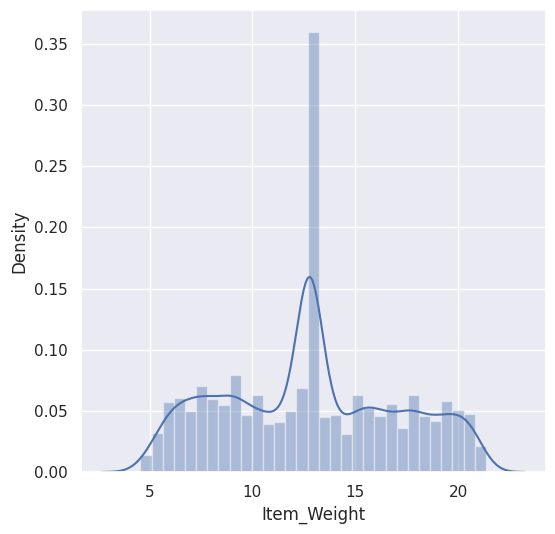

In [14]:
sns.set()

plt.figure(figsize=(6,6))
sns.distplot(data['Item_Weight'])
plt.show()

<ipython-input-15-9bc277e39cf4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Item_Visibility'])


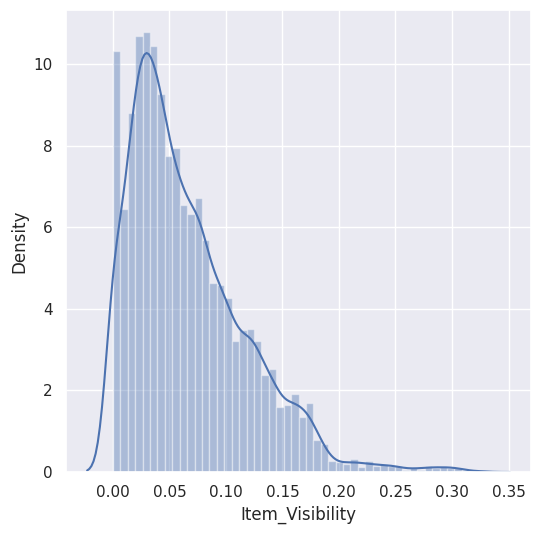

In [15]:
plt.figure(figsize=(6,6))
sns.distplot(data['Item_Visibility'])
plt.show()

<ipython-input-17-9168d8271af4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Item_MRP'])


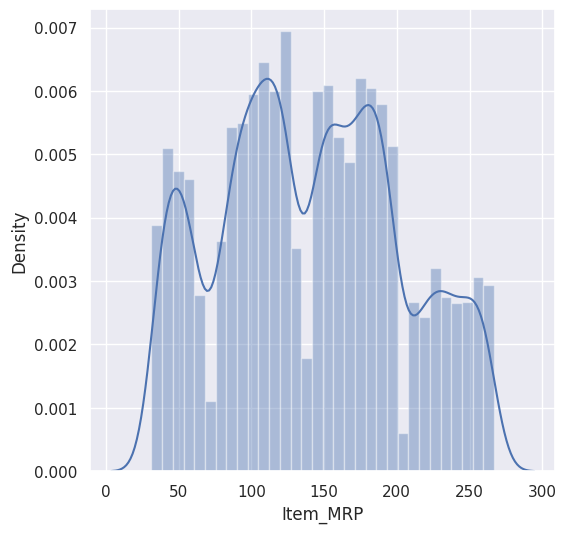

In [17]:
plt.figure(figsize=(6,6))
sns.distplot(data['Item_MRP'])
plt.show()

<ipython-input-19-39a234040911>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Item_Outlet_Sales'])


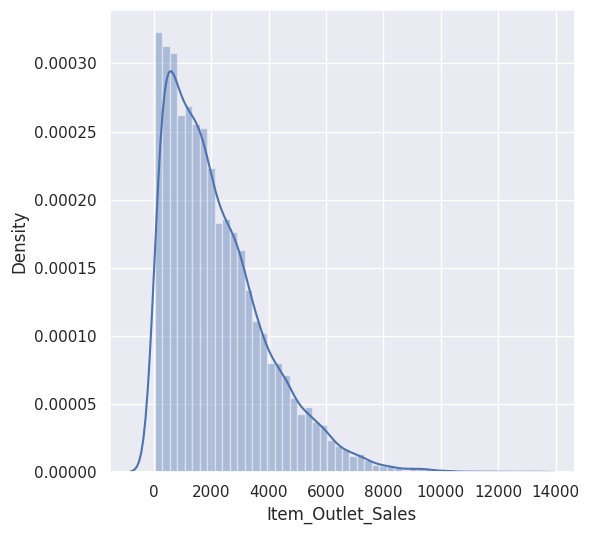

In [19]:
plt.figure(figsize=(6,6))
sns.distplot(data['Item_Outlet_Sales'])
plt.show()

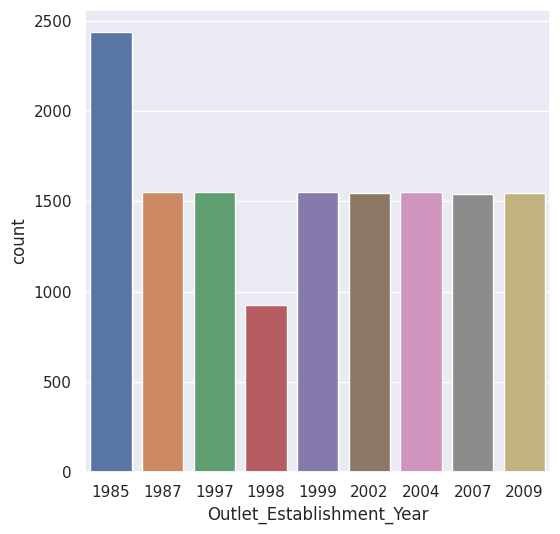

In [21]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=data)
plt.show()

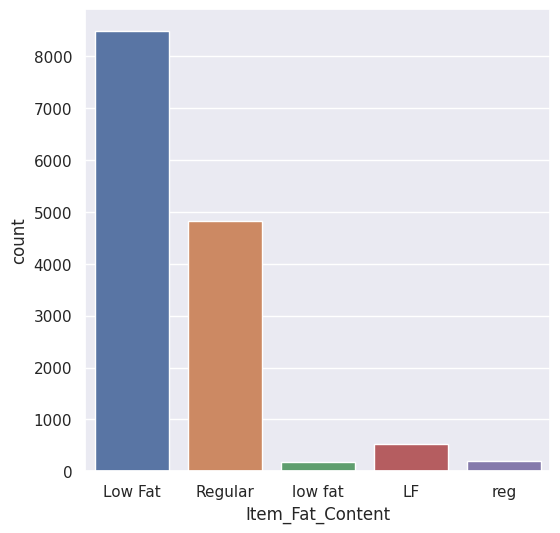

In [23]:
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=data)
plt.show()

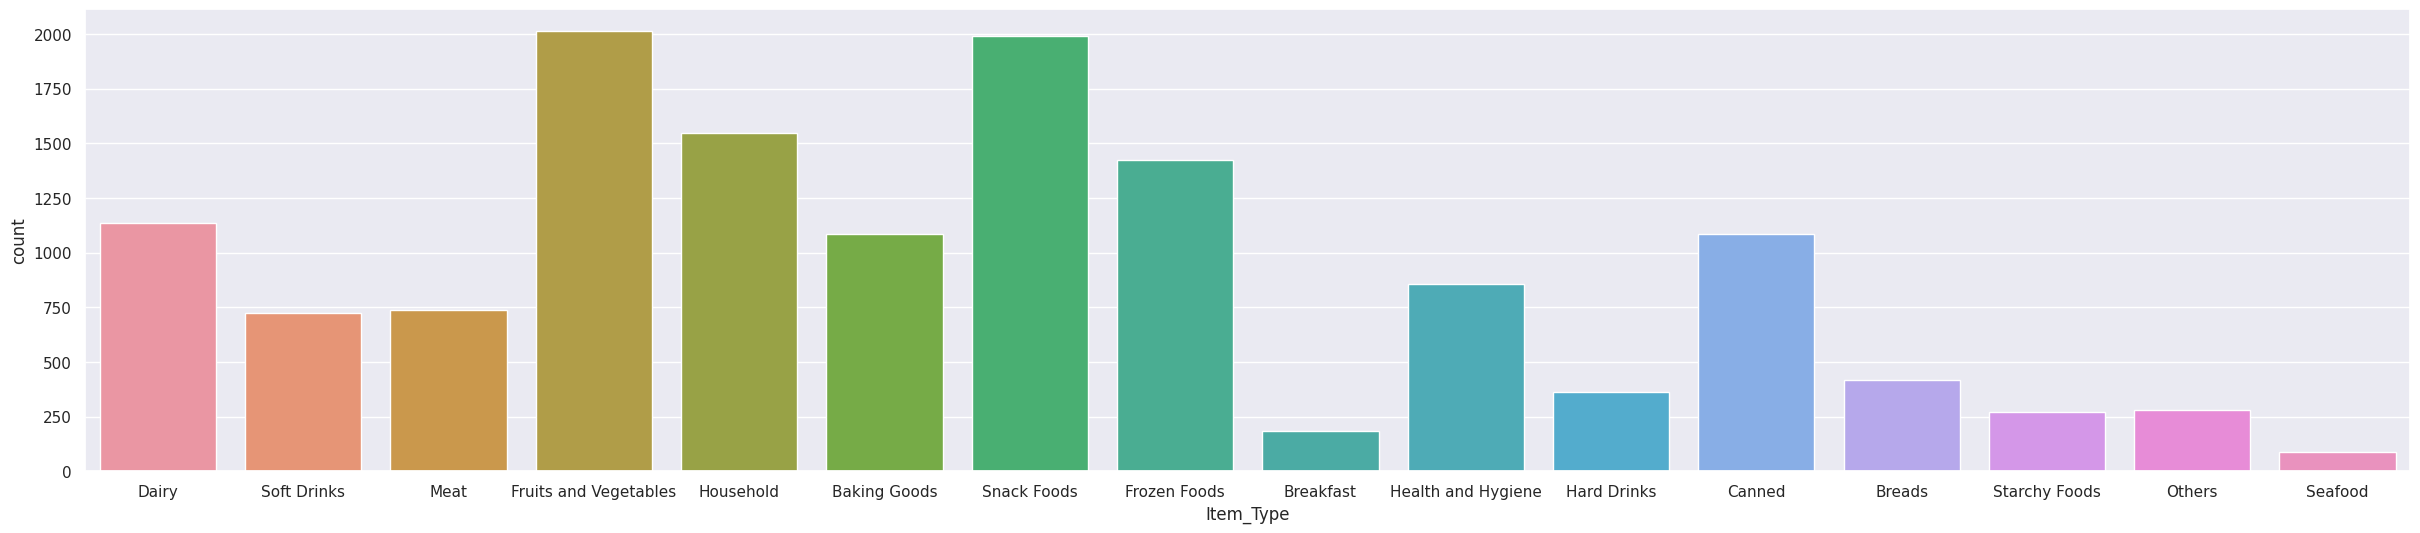

In [25]:
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=data)
plt.show()

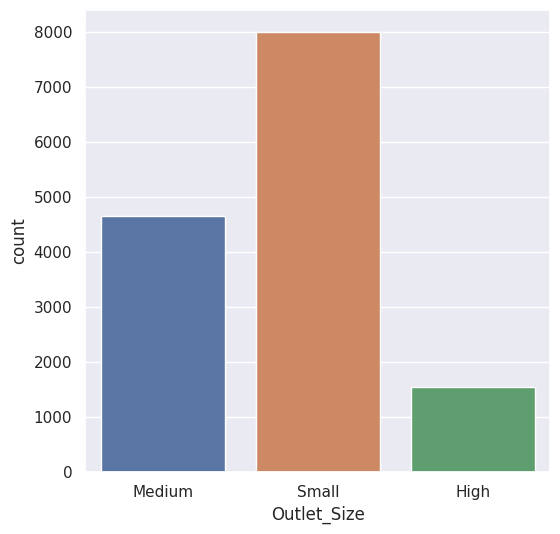

In [27]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=data)
plt.show()

### Pre-Processing : We could spot a lot of labels are non normalized


In [28]:
data['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [29]:
data.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [30]:
data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

## Converting Categorical To Numerical

In [31]:
encoder = LabelEncoder()
data['Item_Identifier'] = encoder.fit_transform(data['Item_Identifier'])
data['Item_Fat_Content'] = encoder.fit_transform(data['Item_Fat_Content'])
data['Item_Type'] = encoder.fit_transform(data['Item_Type'])
data['Outlet_Identifier'] = encoder.fit_transform(data['Outlet_Identifier'])
data['Outlet_Size'] = encoder.fit_transform(data['Outlet_Size'])
data['Outlet_Location_Type'] = encoder.fit_transform(data['Outlet_Location_Type'])
data['Outlet_Type'] = encoder.fit_transform(data['Outlet_Type'])

In [33]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


## Seperating Training And Test Data


In [34]:
train = data[:8522]
test = data[8523:]
test = test.drop(columns= ['Item_Outlet_Sales'])

test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1114,20.750000,0,0.007565,13,107.8622,9,1999,1,0,1
1,1078,8.300000,1,0.038428,4,87.3198,2,2007,2,1,1
2,1420,14.600000,0,0.099575,11,241.7538,0,1998,2,2,0
3,817,7.315000,0,0.015388,13,155.0340,2,2007,2,1,1
4,1197,12.792854,1,0.118599,4,234.2300,5,1985,1,2,3


In [37]:
print(train.shape)
print(test.shape)

(8522, 12)
(5681, 11)


In [35]:
X = train.drop(columns='Item_Outlet_Sales', axis=1)
Y = train['Item_Outlet_Sales']

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
print(X.shape, X_train.shape, X_test.shape)

(8522, 11) (6391, 11) (2131, 11)


## Modeling

In [39]:
regressor = XGBRegressor()
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [40]:
training_data_prediction = regressor.predict(X_train)

In [41]:
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [42]:
print('R Squared value = ', r2_train)

R Squared value =  0.8632071530963413


In [43]:
test_data_prediction = regressor.predict(X_test)

In [44]:
r2_test = metrics.r2_score(Y_test, test_data_prediction)

In [45]:
print('R Squared value = ', r2_test)

R Squared value =  0.5333051215884831


## Final Predictions On The Test Dataset


In [46]:
predictions = regressor.predict(test)

In [50]:
predictions

array([1564.2965, 1251.3584,  902.3365, ..., 1822.773 , 4323.5205,
       1934.0798], dtype=float32)

## Saving The Final Model

In [53]:
regressor.save_model('model.json')